In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Download dos dados
# transforms.ToTensor() -> Transforma imagem em matriz
train_data = datasets.MNIST("", download=True, train=True, transform=transforms.ToTensor()) 
test_data = datasets.MNIST("", download=True, train=False, transform=transforms.ToTensor())

100.0%


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100.0%


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100.0%


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100.0%

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [4]:
#Carregamento dos dados
X_train = DataLoader(train_data, batch_size=10, shuffle=True)
X_test = DataLoader(test_data, batch_size=10, shuffle=True)

In [14]:
class Produto():
    def __init__(self):
        self.nome = 'Camiseta'
        self.preco = 30
    def Desconto(self, x):
        self.preco = self.preco - (self.preco * (x/100))
        print(self.preco)
        
produto1 = Produto()
produto1.Desconto(50)

15.0


In [37]:
import torch.nn as nn
import torch.nn.functional as F
class Rede(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        
        return F.log_softmax(x, dim=1)
    
    #[0.3, -1.4] -> [0.85, 0,15] -> [1, 0]
    
model = Rede()

In [42]:
import torch.optim as op
optimizer = op.SGD(model.parameters(), lr=0.1)
for epoch in range(3):
    for data in X_train:
        X, y = data
        Y = model(X.view(-1,784))
        #otimizacao
        model.zero_grad()
        loss = F.nll_loss(Y, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.3828, grad_fn=<NllLossBackward0>)
tensor(0.2451, grad_fn=<NllLossBackward0>)
tensor(0.0544, grad_fn=<NllLossBackward0>)


In [41]:
# Pesos da camada fc1
model.fc1.weight

Parameter containing:
tensor([[-0.0077,  0.0101, -0.0023,  ...,  0.0295, -0.0097,  0.0232],
        [ 0.0084,  0.0243, -0.0326,  ..., -0.0242, -0.0010, -0.0355],
        [ 0.0148,  0.0087,  0.0183,  ..., -0.0145, -0.0080,  0.0038],
        ...,
        [-0.0312, -0.0063,  0.0145,  ..., -0.0292,  0.0287, -0.0356],
        [ 0.0347,  0.0043, -0.0256,  ..., -0.0078, -0.0121, -0.0079],
        [-0.0340,  0.0001,  0.0108,  ..., -0.0101, -0.0202, -0.0340]],
       requires_grad=True)

In [48]:
import torch
correct = 0
total = 0
for epoch in range(3):
    for data in X_test:
        X, y = data
        Y = model(X.view(-1,784))
        for index, i in enumerate(Y):
            if torch.argmax(i) == y[index]:
                correct += 1
            total += 1
            
print(round((correct/total)*100,3))
        

96.36


tensor(5)


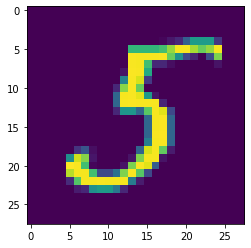

In [57]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("Drawing6.png")
image = transforms.ToTensor()(img)

plt.imshow(image[0].view(28,28))
print(torch.argmax(model(image[0].view(-1,784))[0]))